# Will A customer Accept Bank's Term Deposit?

## 1. Project Description

#### This project aims to predict whether a client will subscribe to a bank term deposit based on historical data from direct marketing campaigns conducted by a Portuguese banking institution. The dataset contains various attributes related to the clients' demographic information, banking history, and details about the marketing campaign.

#### The aim is to develop a classification model that can help the bank target potential customers more effectively, thereby increasing the success rate of their marketing campaigns.

## 2. Dataset Understanding

The dataset used for this project is `bank-full.csv`, [Download](https://archive.ics.uci.edu/dataset/222/bank+marketing), which contains data from direct marketing campaigns. The dataset consists of 17 input variables and one target variable `y`. The target variable `y` indicates whether a client has subscribed to a term deposit `yes` or not `no`.

* The dataset consists of 4521 records.
* the dataset does not have missing values

### 2.1. The variables/Features used for this project are:

1. `age` which is an integer
2. `job` which explains the type of job (categorical: `admin`,`blue-collar`,`entrepreneur`,`housemaid`,`management`,`retired`,`self-employed`,`services`,`student`,`technician`,`unemployed`,`unknown`)
3. `marital` which is marital status (categorical: `divorced`,`married`,`single`,`unknown`; note: 'divorced' means divorced or widowed)
4. `default` which explains if the customer has credit in default - Binary
5. `balance` which is the average yearly balance - Integer
6. `housing` which is if the customer has housing loan - binary
7. `loan` which is if the client has personal loan - binary
8. `campaign` which is the number of contacts performed during this campaign and for this client (numeric, includes last contact)
9. `poutcome` explains the outcome of the previous marketing campaign (categorical: `failure`,`nonexistent`,`success`)
10. `y` which is the target. has the client subscribed a term deposit?

## 3. Data Understanding and Preprocessing

### 3.1 Importing Libraries

In [2]:
# importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

### 3.2 Load dataset

In [3]:
# loading the dataset

# relevant columns
selected_columns = ['age', 'job', 'marital', 'default', 'balance', 'housing', 'loan', 'campaign', 'poutcome', 'y']

# Load the dataset
data = pd.read_csv('Data/bank.csv', delimiter=';', usecols=selected_columns)

# Display the first 5 rows of the dataframe
data.head()

,age,job,marital,default,balance,housing,loan,campaign,poutcome,y
0,30,unemployed,married,no,1787,no,no,1,unknown,no
1,33,services,married,no,4789,yes,yes,1,failure,no
2,35,management,single,no,1350,yes,no,1,failure,no
3,30,management,married,no,1476,yes,yes,4,unknown,no
4,59,blue-collar,married,no,0,yes,no,1,unknown,no


In [8]:
data.shape

(4521, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       4521 non-null   int64 
 1   job       4521 non-null   object
 2   marital   4521 non-null   object
 3   default   4521 non-null   object
 4   balance   4521 non-null   int64 
 5   housing   4521 non-null   object
 6   loan      4521 non-null   object
 7   campaign  4521 non-null   int64 
 8   poutcome  4521 non-null   object
 9   y         4521 non-null   object
dtypes: int64(3), object(7)
memory usage: 353.3+ KB


the dataset has no null values

### 3.3 Visualizing outcome distribution

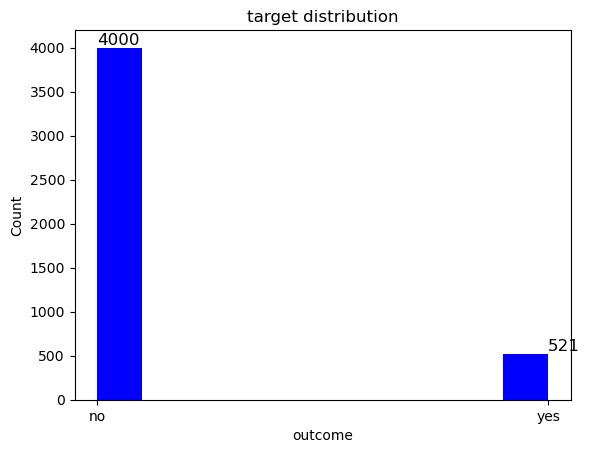

In [10]:
plt.hist(data.y, color='blue')
plt.title('target distribution')
plt.xlabel('outcome')
plt.ylabel('Count')

# Add value counts on top of the bars
value_counts = data['y'].value_counts()
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), va='bottom', fontsize=12)

plt.show()

From the distribution, the number of `yes` is 521 which is 11.7% of the whole dataset. Meaning the data is highly imbalanced to the no outcomes and a model can be 89% right by classifying all as `no` which will not be a good outcome.

We will apply `SMOTE` from `imblearn` module to handle the class imbalance

### 3.4 Visualizing the age distibution of the clients

C:\Users\Floyed\AppData\Local\Temp\ipykernel_8520\3805640322.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age, color='blue')


<Axes: xlabel='age', ylabel='Density'>

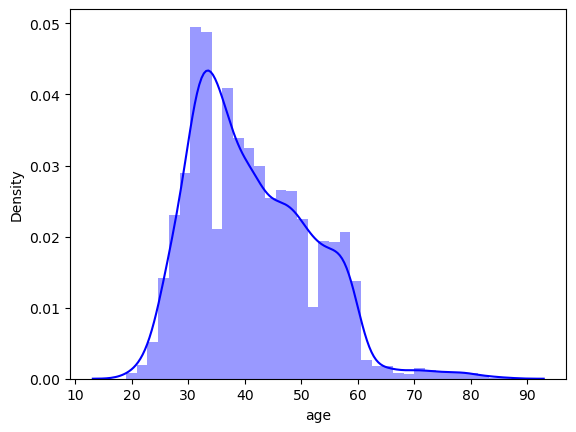

In [5]:
sns.distplot(data.age, color='blue')

### 3.5 distribution of job categories

In [20]:
jobs= pd.crosstab(data['job'], data['y'])
jobs

y,no,yes
job,,
admin.,420,58
blue-collar,877,69
entrepreneur,153,15
housemaid,98,14
management,838,131
retired,176,54
self-employed,163,20
services,379,38
student,65,19


<Axes: xlabel='job'>

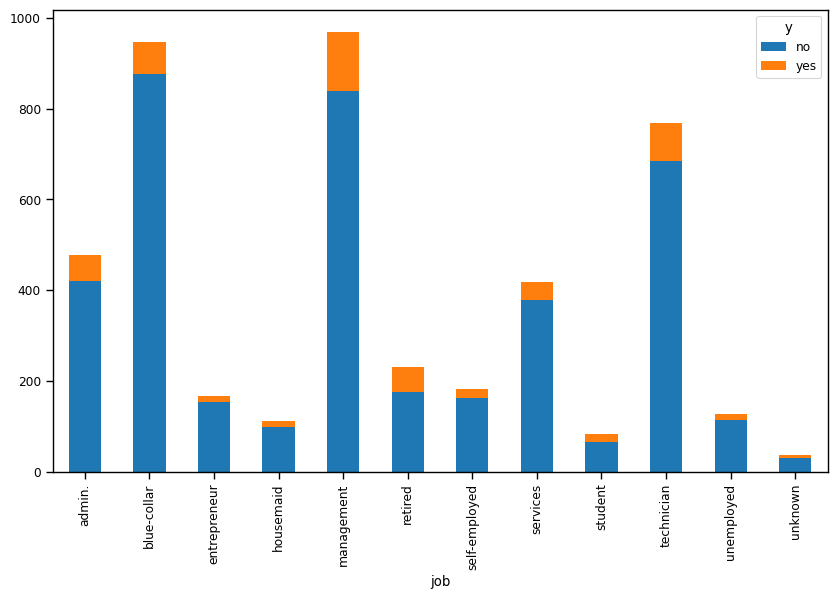

In [21]:
jobs.plot.bar(stacked=True, figsize=(10,6))

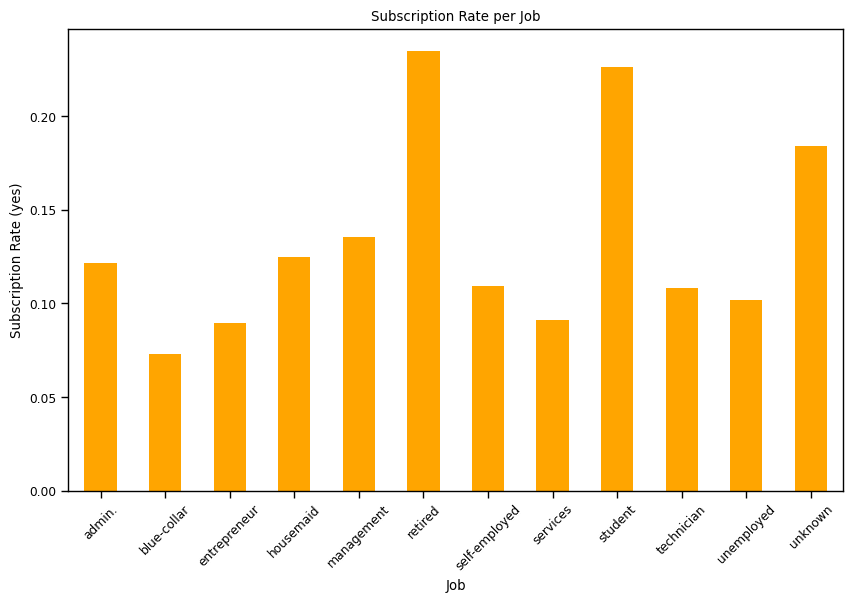

In [12]:
subscription_rate = data.groupby('job')['y'].value_counts(normalize=True).unstack()

plt.figure(figsize=(10, 6))
subscription_rate['yes'].plot(kind='bar', color='orange')
plt.title('Subscription Rate per Job')
plt.xlabel('Job')
plt.ylabel('Subscription Rate (yes)')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

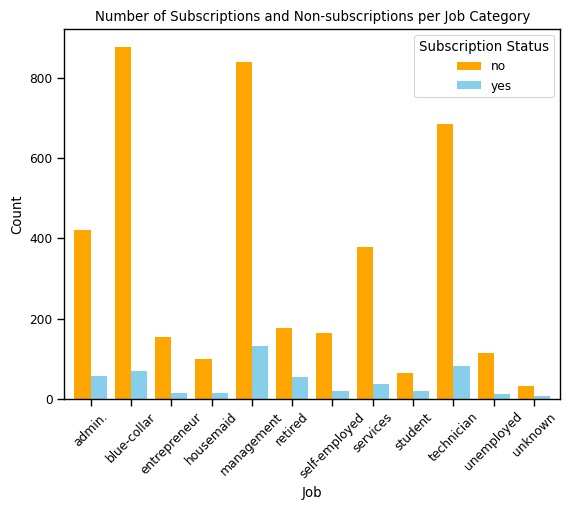

In [14]:
# Count the number of 'yes' and 'no' for each job category
job_subscription_counts = data.groupby('job')['y'].value_counts().unstack()

# Plot the grouped bar chart
plt.figure(figsize=(12, 6))
job_subscription_counts.plot(kind='bar', stacked=False, color=['orange', 'skyblue'], width=0.8)
plt.title('Number of Subscriptions and Non-subscriptions per Job Category')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscription Status')
plt.show()

In [16]:
marital = pd.crosstab(data['marital'], data['y'])
marital

y,no,yes
marital,,
divorced,451,77
married,2520,277
single,1029,167


<Axes: xlabel='marital'>

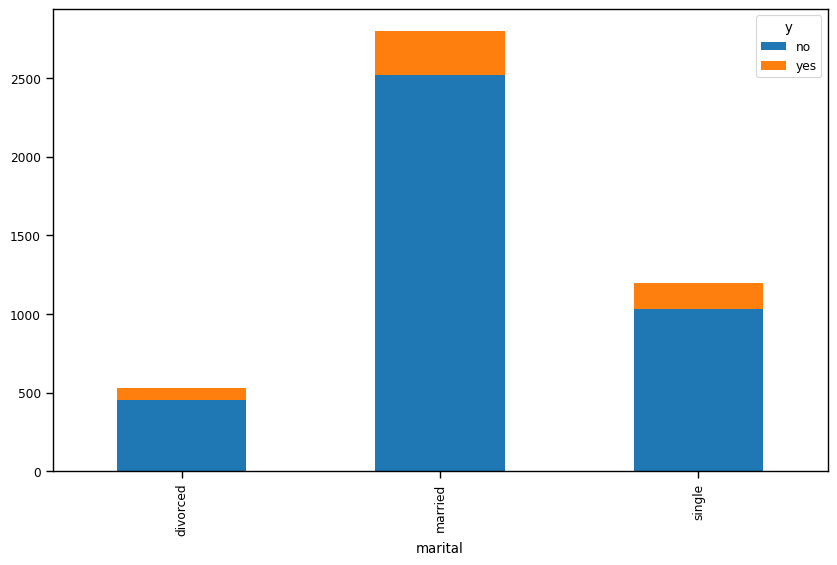

In [17]:
marital.plot.bar(stacked=True, figsize=(10, 6))

In [22]:
poutcome = pd.crosstab(data['poutcome'], data['y'])
poutcome

y,no,yes
poutcome,,
failure,427,63
other,159,38
success,46,83
unknown,3368,337


<Axes: xlabel='poutcome'>

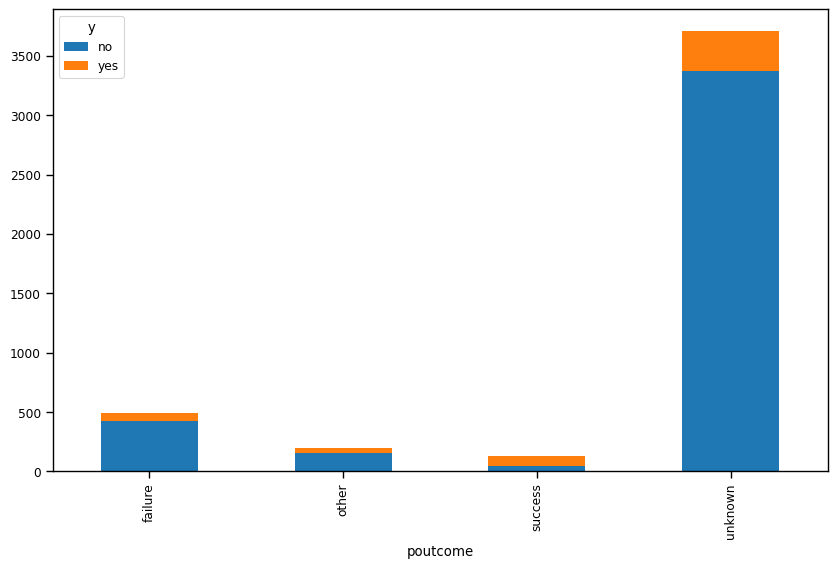

In [23]:
poutcome.plot.bar(stacked=True, figsize=(10,6))

In [24]:
campaigns = pd.crosstab(data['campaign'], data['y'])
campaigns

y,no,yes
campaign,,
1,1494,240
2,1126,138
3,501,57
4,282,43
5,158,9
6,139,16
7,69,6
8,52,4
9,28,2


In [28]:
default = pd.crosstab(data['default'], data['y'])

# Calculate the acceptance rate (the percentage of "yes" subscriptions)
default['acceptance_rate'] = default['yes'] / (default['yes'] + default['no']) * 100

default

y,no,yes,acceptance_rate
default,,,
no,3933,512,11.518560
yes,67,9,11.842105


In [27]:
loan = pd.crosstab(data.loan, data.y)

# Calculate the acceptance rate (the percentage of "yes" subscriptions)
loan['acceptance_rate'] = loan['yes'] / (loan['yes'] + loan['no']) * 100

loan

y,no,yes,acceptance_rate
loan,,,
no,3352,478,12.480418
yes,648,43,6.222865


## 4 Target and features splitting

### 4.1 features and target

In [34]:
# Define features and target
X = data.drop('y', axis=1)
y = data['y']

### 4.2 test-train split

In [35]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.3 One Hot Encoding

In [39]:
# Encoding categorical variables
categorical_cols = ['job', 'marital', 'default', 'housing', 'loan', 'poutcome']

X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

### 4.4 Apply smote to handle the class imbalance

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class

In [40]:
# Apply SMOTE for class imbalance

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

### 4.5 Scaling Numerical Features

In [42]:
# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5 Modelling

## 5.1 Baseline Model - Logistic Regression

Logistic Regression is a good starting point as a baseline model due to its simplicity and interpretability.

In [45]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)

### 5.1.1 Baseline Model evaluation

In [46]:
# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("ROC AUC Score:", roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1]))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.87      0.89       807
         yes       0.19      0.26      0.22        98

    accuracy                           0.80       905
   macro avg       0.55      0.56      0.55       905
weighted avg       0.83      0.80      0.82       905

Confusion Matrix:
[[702 105]
 [ 73  25]]
ROC AUC Score: 0.6475482386263055


### baseline model evaluation


Precision:
* No: 0.91
* Yes: 0.19
    * The model is highly accurate at predicting 'no' outcomes (91%) but performs poorly for 'yes' outcomes (19%). This indicates that the model is not effective at identifying positive cases.


Recall
* No: 0.87
* Yes: 0.26
    * The model is better at identifying 'no' outcomes (87%) but only identifies 26% of the 'yes' outcomes. This suggests that the model is missing a lot of the positive cases.

* The model has a high F1-score for 'no' (0.89) but a very low F1-score for 'yes' (0.22), which indicates that the model's performance is significantly weaker for predicting the 'yes' class.

* The accuracy of the model is 80%, which seems high. However, due to the class imbalance (more 'no' outcomes), accuracy can be misleading. A model could achieve high accuracy by simply predicting the majority class ('no').

#### Confusion Matrix
The confusion matrix confirms that the model has a high number of false positives and false negatives. This contributes to the poor recall and precision for the 'yes' class.

#### ROC AUC Score
* A score of 0.65 indicates that the model has some discriminative power but is not performing very well.
* A score closer to 1.0 would indicate a better model.

## 5.2 Advanced model - Decision Tree